# Fastcampus Data EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'FC_data1.xlsx'
data = pd.read_excel(url)

In [3]:
plt.rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False

In [4]:
data.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634.0,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500.0,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650.0,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000.0,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657.0,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810.0,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656.0,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810.0,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658.0,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500.0,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


,method,pg
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
105414,False,False
105415,False,False
105416,False,False
105417,False,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  float64       
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  float64       
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

In [6]:
data['coupon_title'].unique()

array([nan, '[10% 할인] 시크릿코드 실무 완성편', '[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰',
       '[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰', '[웰컴쿠폰] 온라인 완주반 5만원 할인 쿠폰',
       '?즉시할인 쿠폰 코드 : spring5% ?', '[럭키룰렛] 올인원패키지',
       '[웰컴쿠폰] 올인원 패키지 3만원 할인 쿠폰', '타이포그래피 기수강생 할인 쿠폰',
       '[할인쿠폰] 파이낸스 카테고리 올인원 패키지 30% 할인 (금융 아카데미 제외)', '[럭키룰렛] 완주반',
       '[10% 할인] 프론트엔드 실무 완성편',
       '한 번에 끝내는 Java/Sring 웹 개발 마스터 초격차 패키지 무료 쿠폰 (-2/28)',
       '수강생 50만명 돌파 기념 감사제 쿠폰', '올인원 패키지 : 타이포그래피와 편집디자인 강의 수강권',
       '[무료수강권] 강의 검수용_이호상 PM님', '패캐머_온라인 쿠폰 !',
       '[무료수강권] 파이낸스 카테고리 올인원 패키지_대체투자 자산운용 실무 영상 오픈 일정 변경',
       '한 번에 끝내는 반복 업무 자동화 초격차 패키지 사용 가능 쿠폰', 'crm 검수용 쿠폰 aop',
       '[쿠폰재발급]수강생 50만명 돌파 기념 감사제 쿠폰', '[재발급] 페이백 쿠폰',
       '[무료수강권] 강의검수용_강사님 쿠폰_박혜린 강사님', '신해동 발행 쿠폰', '[무료수강권] 강사님 제공용 RED',
       '[무료수강권] 강사님 제공용', '[할인쿠폰] 영상/디자인 카테고리 올인원 패키지 5만원 할인_영상 오픈 일정 변경',
       '[무료수강권] 내부직원 검수용 RED',
       '[무료수강권] 올인원 패키지 : 인스타를 성장시킨 50명의 성공 방정식 강의검수용_강사님 쿠폰', '올인원패키지',
       '[무료수강권] 내부직원 강의 검수용',
       '[무료수강권] 권오상 회계사

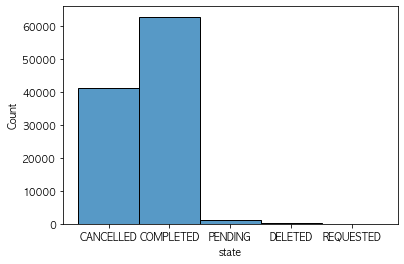

In [7]:
sns.histplot(data=data, x='state')
plt.show()

In [8]:
combine_course_coupon = data[['course_title','coupon_title']]
combine_course_coupon

,course_title,coupon_title
0,올인원 패키지 : 알고리즘 기술면접 완전 정복,NaN
1,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,NaN
2,시크릿코드 : 프론트엔드 실무 완성편,[10% 할인] 시크릿코드 실무 완성편
3,시크릿코드 : 프론트엔드 실무 완성편,NaN
4,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰
...,...,...
105414,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,[WELCOME] 온라인 강의 2만원 할인쿠폰
105415,부동산 디벨로퍼 아카데미 : 인허가,NaN
105416,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,[WELCOME] 온라인 강의 2만원 할인쿠폰
105417,부동산 디벨로퍼 아카데미 : 인허가,NaN


In [9]:
combine_course_coupon

,course_title,coupon_title
0,올인원 패키지 : 알고리즘 기술면접 완전 정복,NaN
1,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,NaN
2,시크릿코드 : 프론트엔드 실무 완성편,[10% 할인] 시크릿코드 실무 완성편
3,시크릿코드 : 프론트엔드 실무 완성편,NaN
4,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰
...,...,...
105414,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,[WELCOME] 온라인 강의 2만원 할인쿠폰
105415,부동산 디벨로퍼 아카데미 : 인허가,NaN
105416,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,[WELCOME] 온라인 강의 2만원 할인쿠폰
105417,부동산 디벨로퍼 아카데미 : 인허가,NaN


In [10]:
data['coupon_title'].value_counts()

[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰                                 5498
[WELCOME] 온라인 강의 3만원 할인쿠폰                                3206
[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰                                 2469
[WELCOME] 온라인 강의 2만원 할인쿠폰                                2325
[WELCOME] 온라인 강의 1만원 할인쿠폰                                1900
                                                         ... 
[무료수강권] 한 번에 끝내는 Java/Spring 웹 개발 마스터 초격차 패키지_안성훈 강사님       1
오늘 단 하루! 하루 10분컷 5%할인 (~6/2)                                1
[무료수강권] RED 검수용_공정필 PM님                                     1
[서포터즈 전용] 재무/세무 회계 실무 완성 무료 수강                              1
[재결제쿠폰]초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍                   1
Name: coupon_title, Length: 494, dtype: int64

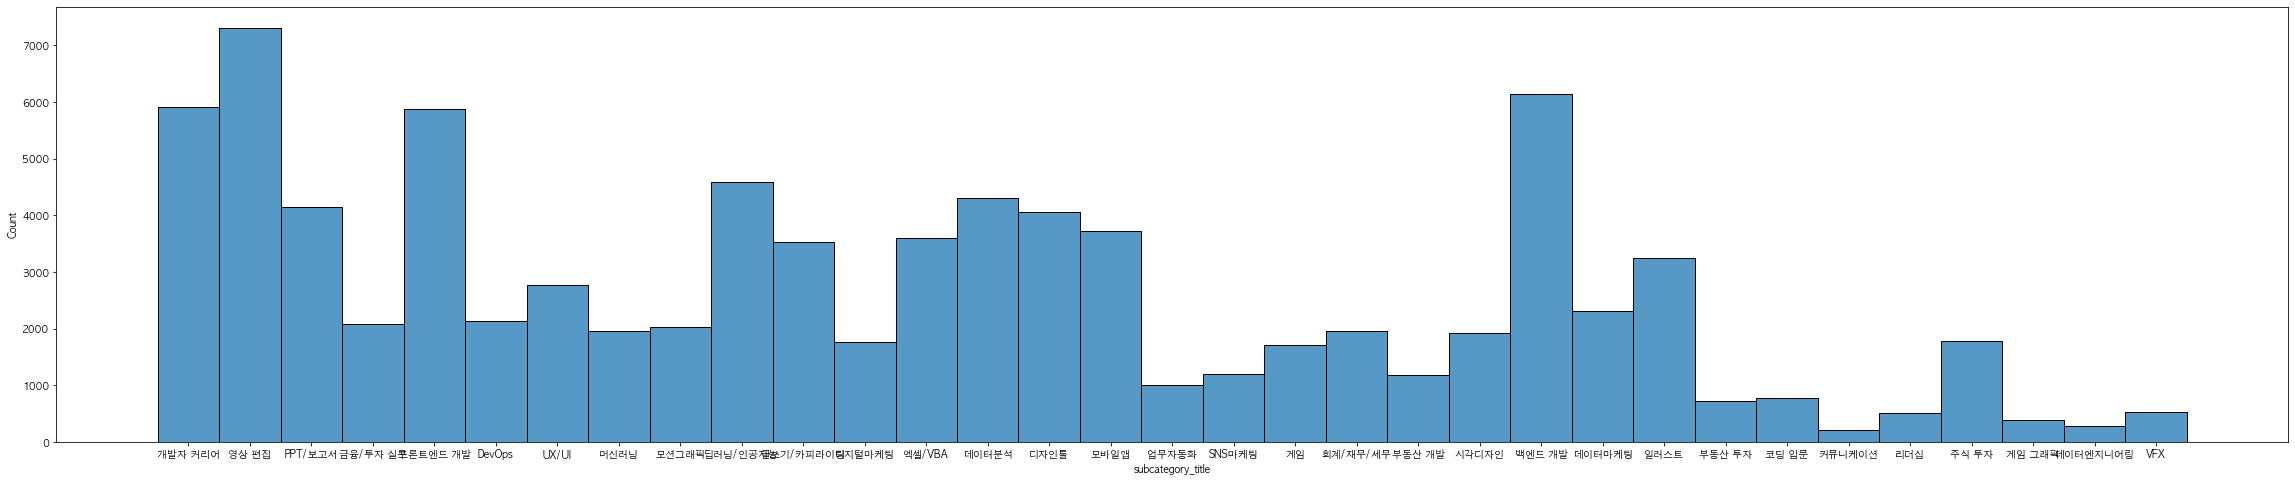

In [5]:
plt.figure(figsize=(40,8))
sns.histplot(data, x='subcategory_title')
plt.show()

In [6]:
data.corr()

,id,customer_id,course_id,transaction_amount,coupon_discount_amount,sale_price,tax_free_amount
id,1.000000,0.201490,0.360501,0.026398,0.069284,0.044891,0.036309
customer_id,0.201490,1.000000,0.023889,0.018670,-0.344772,-0.001245,-0.002124
course_id,0.360501,0.023889,1.000000,0.045096,0.015162,0.042551,0.042170
transaction_amount,0.026398,0.018670,0.045096,1.000000,-0.342960,0.954943,0.947017
coupon_discount_amount,0.069284,-0.344772,0.015162,-0.342960,1.000000,0.251692,0.244997
sale_price,0.044891,-0.001245,0.042551,0.954943,0.251692,1.000000,0.988255
tax_free_amount,0.036309,-0.002124,0.042170,0.947017,0.244997,0.988255,1.000000


In [7]:
data.isna().sum()

id                            0
customer_id                   3
course_id                  5207
type                          0
state                         0
course_title                 16
category_title               24
format                       16
completed_at                  0
transaction_amount            0
coupon_title              73602
coupon_discount_amount    73602
sale_price                 1128
tax_free_amount            1128
pg                        15075
method                    13096
subcategory_title         19829
marketing_start_at        17979
dtype: int64

In [8]:
data.isna().sum() / len(data) * 100

id                         0.000000
customer_id                0.002846
course_id                  4.939337
type                       0.000000
state                      0.000000
course_title               0.015178
category_title             0.022766
format                     0.015178
completed_at               0.000000
transaction_amount         0.000000
coupon_title              69.818534
coupon_discount_amount    69.818534
sale_price                 1.070016
tax_free_amount            1.070016
pg                        14.300079
method                    12.422808
subcategory_title         18.809702
marketing_start_at        17.054800
dtype: float64

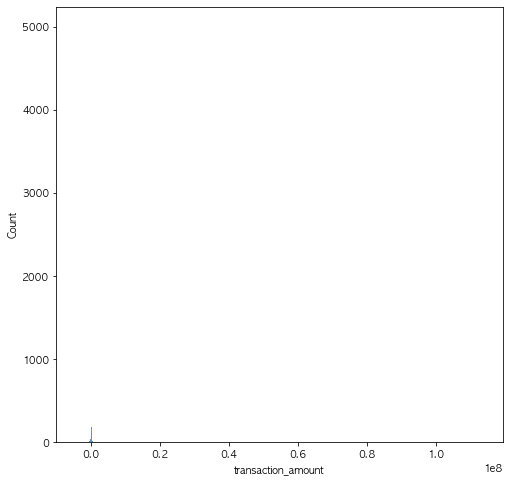

In [9]:
plt.figure(figsize=(8,8))
sns.histplot(data, x='transaction_amount')
plt.show()

# 1. 결제수단 분석

In [10]:
payment_data = data
payment_data['pg'] = data['pg'].fillna('PG')
payment_data.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634.0,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500.0,NaN,NaN,110500.0,110500.0,PG,VBANK,개발자 커리어,NaT
1,970650.0,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000.0,NaN,NaN,116000.0,116000.0,PG,CARD,영상 편집,2020-12-02
2,970657.0,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810.0,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,PG,CARD,NaN,2021-03-04
3,970656.0,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810.0,NaN,NaN,190900.0,190900.0,PG,CARD,NaN,2021-03-04
4,970658.0,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500.0,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,PG,CARD,PPT/보고서,2019-11-14


In [11]:
payment_data['pg'].isna().sum()

0

In [12]:
payment_data[payment_data['method'].isna()]['state'].unique()

array(['CANCELLED', 'REQUESTED', 'COMPLETED'], dtype=object)

In [13]:
payment_data['method'].isna().sum()

13096

In [14]:
payment_data['method'].fillna('', inplace=True)
payment_data['method'].isna().sum()

0

In [15]:
payment_data=payment_data['pg']+ ' '+ payment_data['method']


In [16]:
data2 = data.copy()
data2['payment_data']=payment_data

In [17]:
data2.drop(['pg', 'method'], axis=1, inplace=True)

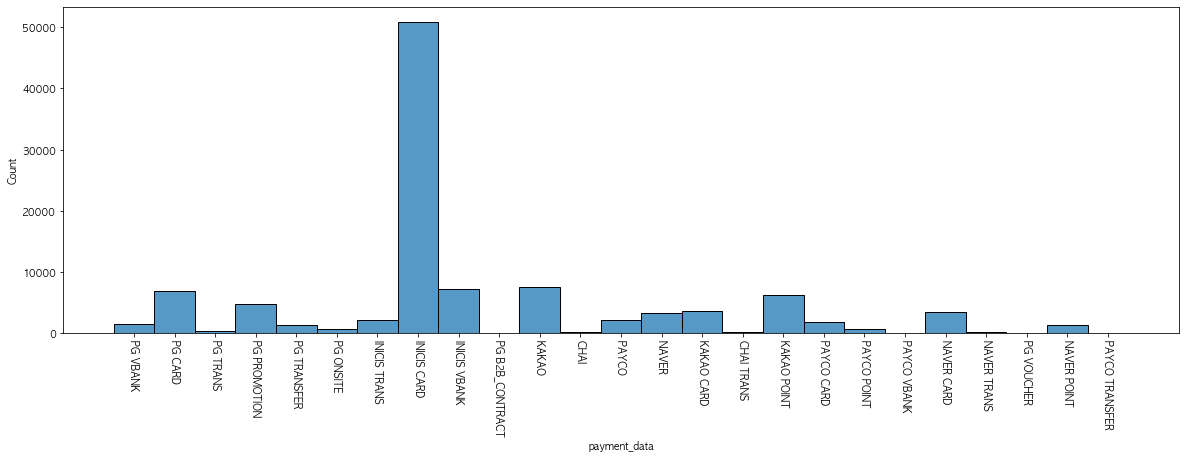

In [18]:
plt.figure(figsize=(20, 6))
sns.histplot(data2, x='payment_data')
plt.xticks(rotation=-90, fontsize=10)
plt.show()

# 2. course title 분석

In [19]:
data2.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,subcategory_title,marketing_start_at,payment_data
0,970634.0,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500.0,NaN,NaN,110500.0,110500.0,개발자 커리어,NaT,PG VBANK
1,970650.0,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000.0,NaN,NaN,116000.0,116000.0,영상 편집,2020-12-02,PG CARD
2,970657.0,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810.0,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,2021-03-04,PG CARD
3,970656.0,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810.0,NaN,NaN,190900.0,190900.0,NaN,2021-03-04,PG CARD
4,970658.0,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500.0,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,PPT/보고서,2019-11-14,PG CARD


In [20]:
how = {
    'course_title' : np.count_nonzero
}

data2.groupby(['category_title', 'subcategory_title', 'course_title']).count()

id  \
category_title subcategory_title course_title                                               
데이터사이언스        데이터분석             Apache Spark을 이용한 빅데이터 분석 입문 15기                      37   
                                 The RED : 데이터 사이언티스트 하용호                             152   
                                 글로벌 엑스퍼트 : 바이오 데이터사이언스(Bioinformatics)                61   
                                 올인원 패키지 : 직장인을 위한 파이썬 데이터분석                          892   
                                 올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP                  201   
...                                                                                   ...   
프로그래밍          프론트엔드 개발          올인원 패키지 : TypeScript & Angular 실전                     95   
                                 올인원 패키지 : Vue.js 압축 완성                               190   
                                 올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & T...  1435   
                                 초격차 패키지 : 한 번에 끝내는 React의 모든 것                       393   
                                 초격차 패키지 : 한 번에 끝내는 프론트엔드 개발                         3257   

                                                                                     customer_id  \
category_title subcategory_title course_title                                                      
데이터사이언스        데이터분석             Apache Spark을 이용한 빅데이터 분석 입문 15기                             37   
                                 The RED : 데이터 사이언티스트 하용호                                    152   
                                 글로벌 엑스퍼트 : 바이오 데이터사이언스(Bioinformatics)                       61   
                                 올인원 패키지 : 직장인을 위한 파이썬 데이터분석                                 892   
                                 올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP                         201   
...                                                                                          ...   
프로그래밍          프론트엔드 개발          올인원 패키지 : TypeScript & Angular 실전                            95   
                                 올인원 패키지 : Vue.js 압축 완성                                      190   
                                 올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & T...         1435   
                                 초격차 패키지 : 한 번에 끝내는 React의 모든 것                              393   
                                 초격차 패키지 : 한 번에 끝내는 프론트엔드 개발                                3257   

                                                                                     course_id  \
category_title subcategory_title course_title                                                    
데이터사이언스        데이터분석             Apache Spark을 이용한 빅데이터 분석 입문 15기                           37   
                                 The RED : 데이터 사이언티스트 하용호                                  152   
                                 글로벌 엑스퍼트 : 바이오 데이터사이언스(Bioinformatics)                     61   
                                 올인원 패키지 : 직장인을 위한 파이썬 데이터분석                               892   
                                 올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP                       201   
...                                                                                        ...   
프로그래밍          프론트엔드 개발          올인원 패키지 : TypeScript & Angular 실전                          95   
                                 올인원 패키지 : Vue.js 압축 완성                                    190   
                                 올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & T...       1435   
                                 초격차 패키지 : 한 번에 끝내는 React의 모든 것                            393   
                                 초격차 패키지 : 한 번에 끝내는 프론트엔드 개발                              3257   

                                                                                     type  \
category_title subcategory_title course_title                                               
데이터사이언스        데이터분석             Apache Spark을 이용한 빅데이터 분석 입문 15기                      37   
                      

In [21]:
sns.pairplot(data2)

Error in callback <function flush_figures at 0x155843c10> (for post_execute):


KeyboardInterrupt: 

In [22]:
corr = data2.corr()
corr

,id,customer_id,course_id,transaction_amount,coupon_discount_amount,sale_price,tax_free_amount
id,1.000000,0.201490,0.360501,0.026398,0.069284,0.044891,0.036309
customer_id,0.201490,1.000000,0.023889,0.018670,-0.344772,-0.001245,-0.002124
course_id,0.360501,0.023889,1.000000,0.045096,0.015162,0.042551,0.042170
transaction_amount,0.026398,0.018670,0.045096,1.000000,-0.342960,0.954943,0.947017
coupon_discount_amount,0.069284,-0.344772,0.015162,-0.342960,1.000000,0.251692,0.244997
sale_price,0.044891,-0.001245,0.042551,0.954943,0.251692,1.000000,0.988255
tax_free_amount,0.036309,-0.002124,0.042170,0.947017,0.244997,0.988255,1.000000


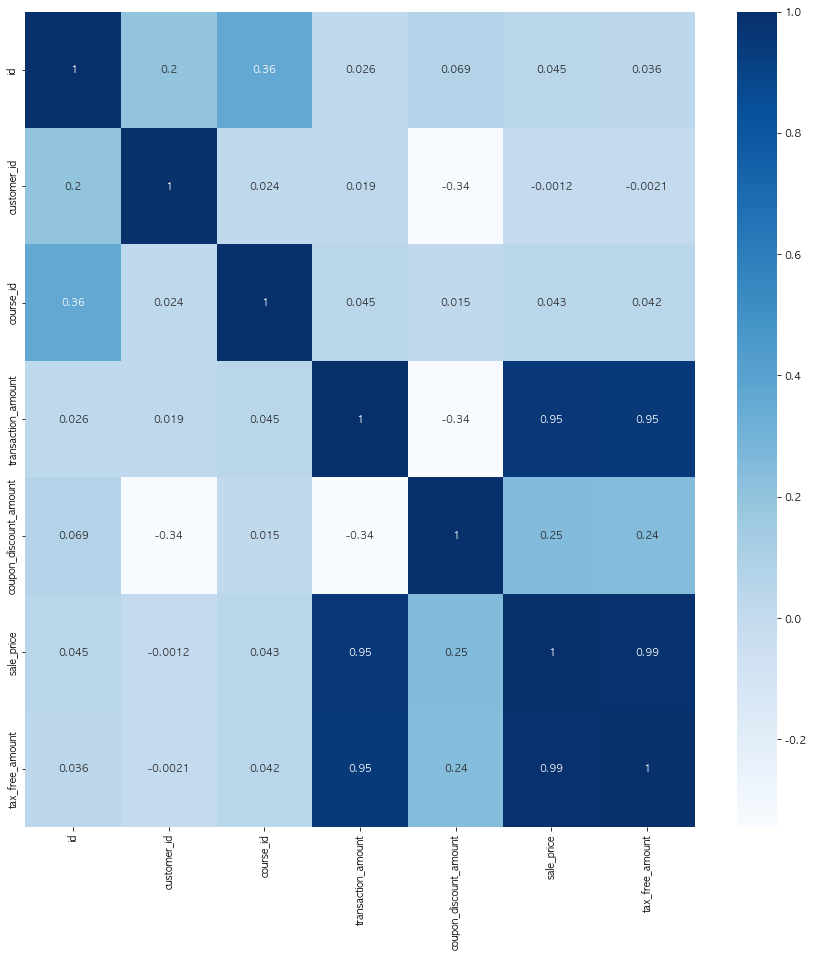

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(data=corr, cmap='Blues', annot=True)
plt.show()

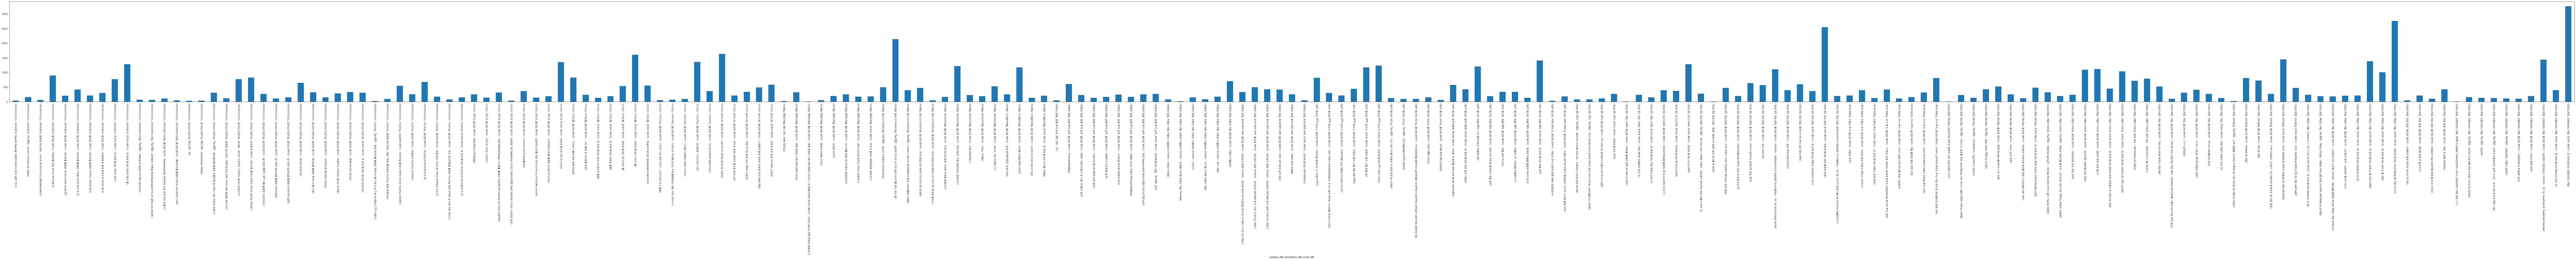

In [24]:
plt.figure(figsize=(200,8))
data2.groupby(['category_title', 'subcategory_title','course_title'])['id'].count().plot(kind='bar')
plt.xticks(rotation=-90)
plt.show()

# 3. Format 분석

In [25]:
data2['format'].isna().sum()

16

In [26]:
data2['format'].unique()

array(['올인원', '스쿨 온라인', '온라인 완주반', 'RED', 'B2B 온라인', '캠프', '스쿨', nan,
       'B2B', '이벤트', '하루10분컷', '아카이브', '관리', '온라인', 'MBA', '콜로소', 'B2G'],
      dtype=object)

In [27]:
data2[data2['format'].isna()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,subcategory_title,marketing_start_at,payment_data
9002,996843.0,490139.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-07 15:05:06,480000.0,NaN,NaN,NaN,NaN,NaN,NaT,PG TRANSFER
9003,996793.0,490089.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-07 15:05:06,600000.0,NaN,NaN,NaN,NaN,NaN,NaT,PG TRANSFER
9004,996842.0,490138.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-07 15:05:06,600000.0,NaN,NaN,NaN,NaN,NaN,NaT,PG TRANSFER
9005,996851.0,490149.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-07 15:05:06,600000.0,NaN,NaN,NaN,NaN,NaN,NaT,PG TRANSFER
12133,1011200.0,NaN,NaN,TRANSACTION,COMPLETED,NaN,NaN,NaN,2021-04-12 11:40:00,0.0,NaN,NaN,NaN,NaN,NaN,NaT,PG B2B_CONTRACT
12181,1006736.0,291328.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-12 13:10:10,967000.0,NaN,NaN,NaN,NaN,NaN,NaT,PG TRANSFER
13754,1012747.0,498414.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-15 20:40:35,170000.0,NaN,NaN,NaN,NaN,NaN,NaT,PG TRANSFER
31192,1063323.0,524510.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-05-10 18:04:33,35000.0,NaN,NaN,NaN,NaN,NaN,NaT,PG TRANSFER
36367,1066932.0,NaN,NaN,TRANSACTION,COMPLETED,NaN,NaN,NaN,2021-05-17 16:12:00,0.0,NaN,NaN,NaN,NaN,NaN,NaT,PG B2B_CONTRACT
38944,1093777.0,539708.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-05-22 10:57:39,127500.0,NaN,NaN,NaN,NaN,NaN,NaT,PG TRANSFER


In [28]:
complete_transaction_amount = data2[data2['state'] == 'COMPLETED']['transaction_amount'].sum()
canceled_transaction_amount = data2[data2['state'] == 'CANCELLED']['transaction_amount'].sum()

In [29]:
print(complete_transaction_amount, canceled_transaction_amount)

8945495307.0 6258381318.0


In [30]:
how = {
    'transaction_amount' : np.sum
}
data2.groupby(data2['state']).agg(how)

,transaction_amount
state,
CANCELLED,6.258381e+09
COMPLETED,8.945495e+09
DELETED,5.603260e+07
PENDING,1.799420e+08
REQUESTED,2.073700e+06


In [78]:
how = {
    'transaction_amount' : np.sum
}
data2.groupby(['type','state']).agg(how)

transaction_amount
type        state                        
ORDER       CANCELLED        4841461868.0
            COMPLETED         932961850.0
PAYMENT     CANCELLED        1416919450.0
            COMPLETED        8642456412.0
            DELETED            57635600.0
            PENDING           179941980.0
            REQUESTED           2073700.0
REFUND      COMPLETED        -629922955.0
            DELETED            -1603000.0
TRANSACTION COMPLETED                 0.0

In [77]:
pd.options.display.float_format = '{:.1f}'.format

In [79]:
# ORDER 결제는 하지 않았지만 수강신청만 되어있는 상태
# CANCELLED 

15441924905.0

# 4 가장 많이 팔린 Format

In [89]:
data2[data2['format'].isna()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,subcategory_title,marketing_start_at,payment_data
9002,996843.0,490139.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-07 15:05:06,480000.0,NaN,NaN,NaN,NaN,NaN,NaT,PG TRANSFER
9003,996793.0,490089.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-07 15:05:06,600000.0,NaN,NaN,NaN,NaN,NaN,NaT,PG TRANSFER
9004,996842.0,490138.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-07 15:05:06,600000.0,NaN,NaN,NaN,NaN,NaN,NaT,PG TRANSFER
9005,996851.0,490149.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-07 15:05:06,600000.0,NaN,NaN,NaN,NaN,NaN,NaT,PG TRANSFER
12133,1011200.0,NaN,NaN,TRANSACTION,COMPLETED,NaN,NaN,NaN,2021-04-12 11:40:00,0.0,NaN,NaN,NaN,NaN,NaN,NaT,PG B2B_CONTRACT
12181,1006736.0,291328.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-12 13:10:10,967000.0,NaN,NaN,NaN,NaN,NaN,NaT,PG TRANSFER
13754,1012747.0,498414.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-15 20:40:35,170000.0,NaN,NaN,NaN,NaN,NaN,NaT,PG TRANSFER
31192,1063323.0,524510.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-05-10 18:04:33,35000.0,NaN,NaN,NaN,NaN,NaN,NaT,PG TRANSFER
36367,1066932.0,NaN,NaN,TRANSACTION,COMPLETED,NaN,NaN,NaN,2021-05-17 16:12:00,0.0,NaN,NaN,NaN,NaN,NaN,NaT,PG B2B_CONTRACT
38944,1093777.0,539708.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-05-22 10:57:39,127500.0,NaN,NaN,NaN,NaN,NaN,NaT,PG TRANSFER


In [32]:
data3 = data2.copy()
data3['format'].dropna()

0            올인원
1            올인원
2         스쿨 온라인
3         스쿨 온라인
4            올인원
           ...  
105414       올인원
105415       올인원
105416       올인원
105417       올인원
105418       올인원
Name: format, Length: 105403, dtype: object

In [33]:
data3 = data3.drop(data3.loc[data3['format'].isna()].index)
data3['format'].unique()

array(['올인원', '스쿨 온라인', '온라인 완주반', 'RED', 'B2B 온라인', '캠프', '스쿨', 'B2B',
       '이벤트', '하루10분컷', '아카이브', '관리', '온라인', 'MBA', '콜로소', 'B2G'],
      dtype=object)

In [67]:
how = {
    'customer_id' : np.count_nonzero,
    'transaction_amount' : np.sum,
    
}

data3.groupby(['format','category_title', 'state']).agg(how)

customer_id  transaction_amount
format category_title state                                     
B2B    교육             COMPLETED            6          24347500.0
       데이터사이언스        CANCELLED            7         102211000.0
                      COMPLETED           25         475971780.0
       마케팅            CANCELLED            2          19846400.0
                      COMPLETED            3         124222500.0
...                                      ...                 ...
하루10분컷 비즈니스           COMPLETED            4             95865.0
       업무 생산성         CANCELLED         1565          32215580.0
                      COMPLETED         1367          26630441.0
                      DELETED              2             44400.0
                      PENDING             36            738940.0

[157 rows x 2 columns]

In [77]:
data4 = data3.copy()
data4= data4.drop(data4.loc[data4['state'] != 'COMPLETED'].index)

In [86]:
how = {
    'transaction_amount' : np.sum,
}
data4.groupby(['category_title', 'state']).agg(how)

,,transaction_amount
category_title,state,
관리,COMPLETED,"150,000.0"
교육,COMPLETED,"1,160,775,545.0"
데이터 사이언스,COMPLETED,"1,550,000.0"
데이터사이언스,COMPLETED,"1,660,328,649.0"
디자인,COMPLETED,"777,925,268.0"
마케팅,COMPLETED,"868,305,624.0"
부동산/금융,COMPLETED,"538,303,534.0"
비즈니스,COMPLETED,"5,389,865.0"
업무 생산성,COMPLETED,"663,920,925.0"


In [85]:
pd.options.display.max_rows = 200

pd.options.display.max_info_columns =200

pd.options.display.float_format = '{:,}'.format

array(['PAYMENT', 'REFUND', 'ORDER'], dtype=object)